# Latin Hypercube Sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [21]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the LHS class from UQpy.
from UQpy.SampleMethods import LHS
import numpy as np
import matplotlib.pyplot as plt
import time

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved minimum correlation of  0.020266296950062084
Successful execution of LHS design.
[[0.50702828 0.87562419]
 [0.68459465 0.79731598]
 [0.83150672 0.02381394]
 [0.09074553 0.28987038]
 [0.20432937 0.40798261]]


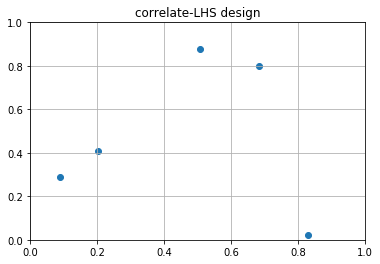

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.41781674148017794
Successful execution of LHS design.
[[0.7695294  0.11010594]
 [0.31117192 0.25360422]
 [0.07743904 0.67663881]
 [0.40282876 0.93873108]
 [0.98438397 0.5980478 ]]


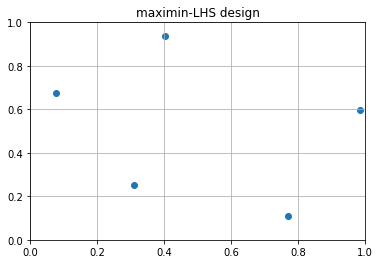

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.94389379 0.08462129]
 [0.13929384 0.69618638]
 [0.71026295 0.8784235 ]
 [0.44537029 0.39615284]
 [0.25722787 0.53696595]]


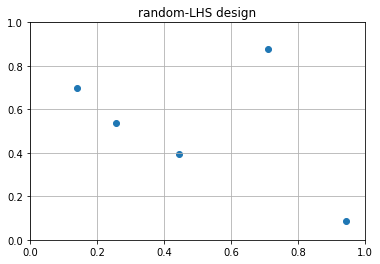

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


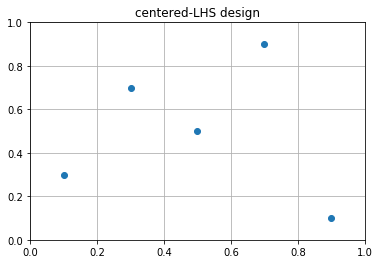

[[0.1 0.1]
 [0.9 0.9]
 [0.3 0.3]
 [0.5 0.5]
 [0.7 0.7]]


In [28]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run LHS for two uniform U(0,1) random variables.
from UQpy.Distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x1a = LHS(dist_object=[dist1, dist2], criterion='correlate', random_state=np.random.RandomState(123), nsamples=5, verbose=True)
print(x1a.samples)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()



x1b = LHS(dist_object=[dist1, dist2], criterion='maximin', random_state=np.random.RandomState(123),  nsamples=5, verbose=True)
print(x1b.samples)

fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1c = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(123), verbose=True)
print(x1c.samples)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1d = LHS(dist_object=[dist1, dist2], criterion='centered', random_state=np.random.RandomState(123),  nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

x1d.transform_u01()
print(x1d.samplesU01)

In [20]:
from UQpy.Distributions import Uniform, Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x2a = LHS(dist_object=[dist1, dist2], criterion='random', random_state=np.random.RandomState(123), nsamples=5, verbose=True)
print('LHS design:', x2a.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
LHS design: [[ 0.55415307  0.69618638]
 [-0.13736717  0.8784235 ]
 [-1.08349747  0.08462129]
 [-0.65191542  0.39615284]
 [ 1.58832701  0.53696595]]


In [29]:
# Run LHS for a user-defined criterion and metric
#def distance(x):
#    return x+1

def criterion():
    nsamples = 5
    dimension = 2
    cut = np.linspace(0, 1, nsamples + 1)
    a = cut[:nsamples]
    b = cut[1:nsamples + 1]

    samples = np.zeros([nsamples, dimension])
    centers = (a + b) / 2

    for i in range(dimension):
        samples[:, i] = np.random.permutation(centers)
    return samples

dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)
x1e = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(123), criterion=criterion, verbose=True)
print(x1e.samples)

x1d = LHS(dist_object=[dist1, dist2], criterion='centered', random_state=np.random.RandomState(123), nsamples=5, verbose=True)
print(x1d.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.7 0.3]
 [0.3 0.1]
 [0.5 0.7]
 [0.1 0.5]
 [0.9 0.9]]
UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.7 0.3]
 [0.9 0.1]
 [0.5 0.5]
 [0.3 0.7]
 [0.1 0.9]]


In [16]:
# We are going to run LHS for a Joint distribution.
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointInd(marginals=marginals)

x2 = LHS(dist_object=dist, nsamples=5, criterion='maximin', random_state=np.random.RandomState(123), verbose=True)
x2.transform_u01()
print(x2.samples)
print(x2.samplesU01)

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.4383842384455112
Successful execution of LHS design.
[[   6.55622833   28.37843148]
 [   3.23983111 1296.89712203]
 [   1.90999744   64.56955818]
 [  -2.16337928  116.64492606]
 [   1.32300004  284.04803232]]
[[0.98864011 0.04902612]
 [0.73234331 0.98491038]
 [0.48205314 0.20263197]
 [0.01868541 0.40482968]
 [0.36749322 0.74187714]]
